In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

%load_ext nb_black

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<IPython.core.display.Javascript object>

In [2]:
# data source: https://star-history.com/#casact/chainladder-python&lifelib-dev/lifelib&mages/ChainLadder&fumitoh/modelx&Date
data = pd.read_csv("star-history-20231006.csv")
data.columns =["Package", "Record_Date","Stars"]
data.head()

,Package,Record_Date,Stars
0,casact/chainladder-python,Sat Jan 05 2019 01:11:49 GMT-0800 (Pacific Sta...,11
1,casact/chainladder-python,Tue Nov 19 2019 18:31:07 GMT-0800 (Pacific Sta...,21
2,casact/chainladder-python,Mon Apr 06 2020 11:24:07 GMT-0700 (Pacific Day...,31
3,casact/chainladder-python,Mon Jul 13 2020 22:36:41 GMT-0700 (Pacific Day...,41
4,casact/chainladder-python,Wed Oct 21 2020 07:03:52 GMT-0700 (Pacific Day...,51


<IPython.core.display.Javascript object>

In [3]:
data["Record_Date_P"] = pd.to_datetime(data["Record_Date"].str.slice(start=4, stop=15))
data

,Package,Record_Date,Stars,Record_Date_P
0,casact/chainladder-python,Sat Jan 05 2019 01:11:49 GMT-0800 (Pacific Sta...,11,2019-01-05
1,casact/chainladder-python,Tue Nov 19 2019 18:31:07 GMT-0800 (Pacific Sta...,21,2019-11-19
2,casact/chainladder-python,Mon Apr 06 2020 11:24:07 GMT-0700 (Pacific Day...,31,2020-04-06
3,casact/chainladder-python,Mon Jul 13 2020 22:36:41 GMT-0700 (Pacific Day...,41,2020-07-13
4,casact/chainladder-python,Wed Oct 21 2020 07:03:52 GMT-0700 (Pacific Day...,51,2020-10-21
5,casact/chainladder-python,Wed Mar 31 2021 20:47:40 GMT-0700 (Pacific Day...,61,2021-03-31
6,casact/chainladder-python,Tue Jun 01 2021 05:11:26 GMT-0700 (Pacific Day...,71,2021-06-01
7,casact/chainladder-python,Mon Nov 01 2021 12:03:23 GMT-0700 (Pacific Day...,81,2021-11-01
8,casact/chainladder-python,Wed Jan 12 2022 20:15:08 GMT-0800 (Pacific Sta...,91,2022-01-12
9,casact/chainladder-python,Wed Mar 30 2022 11:26:12 GMT-0700 (Pacific Day...,101,2022-03-30


<IPython.core.display.Javascript object>

In [4]:
data["Package"].unique()

array(['casact/chainladder-python', 'lifelib-dev/lifelib',
       'mages/ChainLadder'], dtype=object)

<IPython.core.display.Javascript object>

In [5]:
data["Record_Date_P"].min()

Timestamp('2015-01-07 00:00:00')

<IPython.core.display.Javascript object>

In [6]:
data["Record_Date_P"].max()

Timestamp('2023-10-06 00:00:00')

<IPython.core.display.Javascript object>

In [7]:
star_axis_max = 175

<IPython.core.display.Javascript object>

Text(0, 0.5, 'GitHub Stars ★')

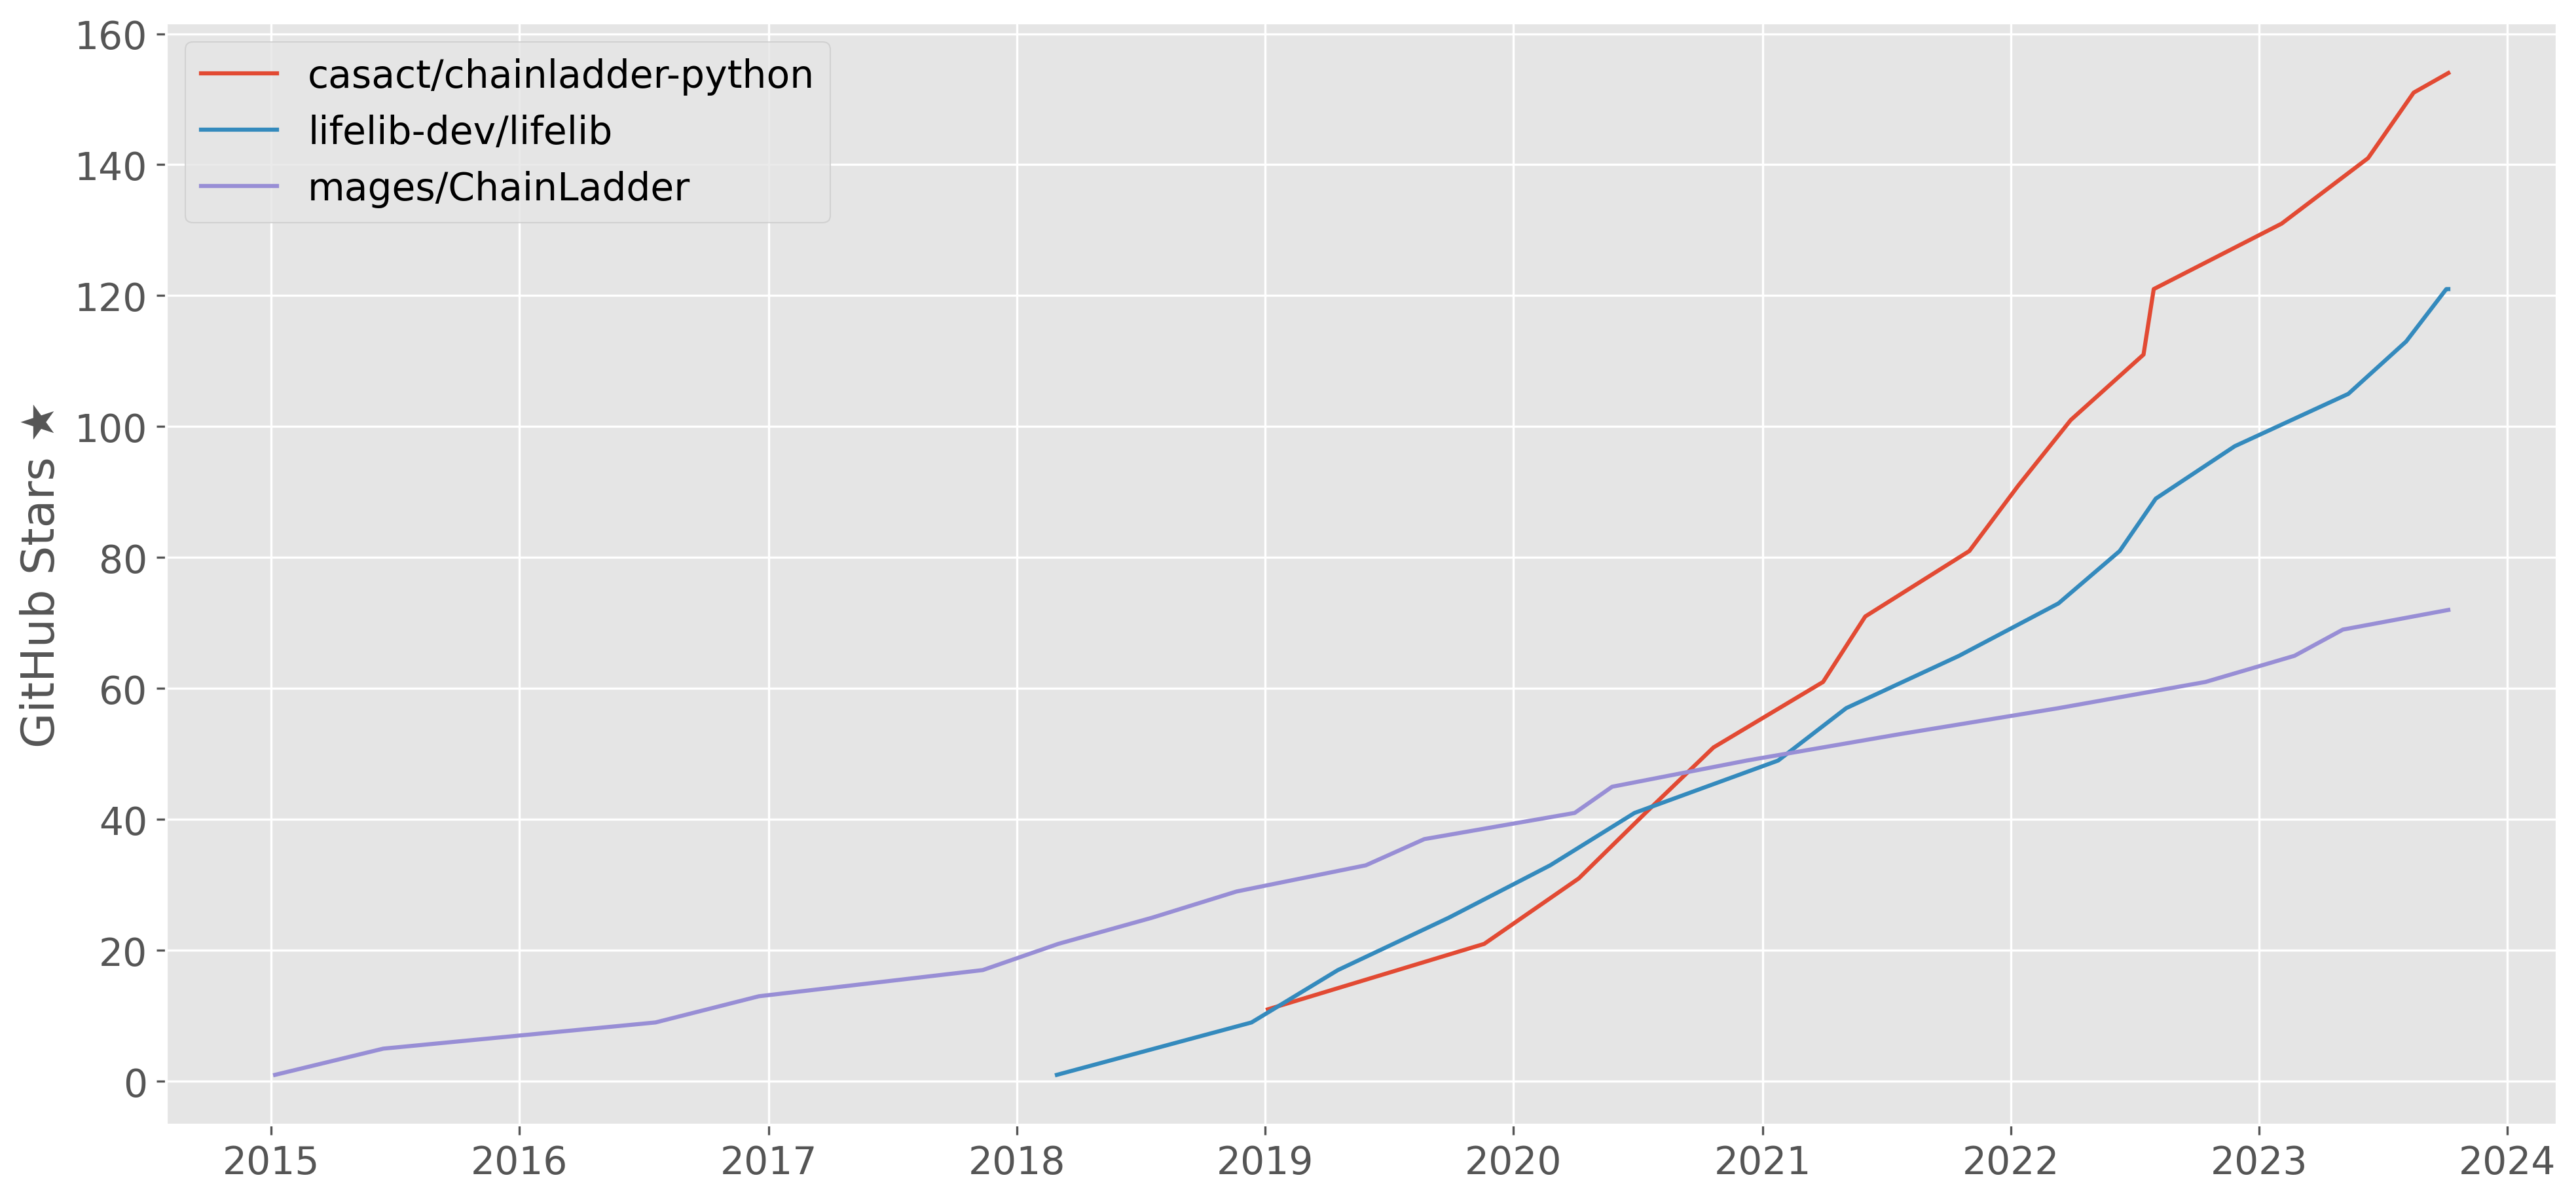

<IPython.core.display.Javascript object>

In [10]:
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(13, 6), dpi=150, layout='constrained')
ax.plot('Record_Date_P', 'Stars', data=data[data["Package"]=="casact/chainladder-python"],label = "casact/chainladder-python")
ax.plot('Record_Date_P', 'Stars', data=data[data["Package"]=="lifelib-dev/lifelib"], label="lifelib-dev/lifelib")
ax.plot('Record_Date_P', 'Stars', data=data[data["Package"]=="mages/ChainLadder"],     label = "mages/ChainLadder")

ax.legend(loc = "upper left")

ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
# ax.set_xlabel("Time")
ax.set_ylabel("GitHub Stars ★")